<a href="https://colab.research.google.com/github/yadukrishnanp2001/Deep-Learning-Based-Classification-of-Oral-Squamous-Cell-Carcinoma-vs.-Norma/blob/main/DenseNet201%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashenafifasilkebede/dataset")

print("Path to dataset files:", path)

100%|██████████| 2.93G/2.93G [02:11<00:00, 23.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import keras
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.applications import *
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [ ]:
Image_size = 224
input_shape = (224,224,3)

In [ ]:
# Construct paths dynamically
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')
val_dir = os.path.join(path, 'val')

print("Train directory:", train_dir)
print("Test directory:", test_dir)
print("Validation directory:", val_dir)

Train directory: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/train
Test directory: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/test
Validation directory: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/val


In [ ]:
train_dir = '/root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/train'
test_dir = '/root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/test'
val_dir= '/root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/val'

In [ ]:
# train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=45, width_shift_range=0.2,
#       height_shift_range=0.2,
#       horizontal_flip=True).flow_from_directory(
#               directory = os.path.join(train_dir),
#               target_size=(Image_size,Image_size),
#               batch_size =32,shuffle=True,
#              class_mode='categorical')

Found 4946 images belonging to 2 classes.


In [ ]:
# val_gen = ImageDataGenerator(preprocessing_function=preprocess_input,rotation_range=45, width_shift_range=0.2,
#       height_shift_range=0.2,
#       horizontal_flip=True).flow_from_directory(
#               directory = os.path.join(val_dir),
#               target_size=(Image_size,Image_size),
#               batch_size =32,shuffle=True,
#              class_mode='categorical')

Found 120 images belonging to 2 classes.


In [ ]:
# test_gen = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
#     directory=os.path.join(test_dir),
#     target_size=(Image_size, Image_size),
#     batch_size=32,
#     shuffle=False,  # Set shuffle to False for test data
#     class_mode='categorical'
# )

Found 126 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters (adjust as needed)
Image_size = 224  # Ensure this matches your model's expected input size
BATCH_SIZE = 90

# Training generator (with augmentation)
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
).flow_from_directory(
    directory=train_dir,  # No need for os.path.join() if train_dir is already a full path
    target_size=(Image_size, Image_size),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical'
)

# Validation generator (NO AUGMENTATION)
val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input  # Remove augmentation for validation
).flow_from_directory(
    directory=val_dir,
    target_size=(Image_size, Image_size),
    batch_size=BATCH_SIZE,
    shuffle=False,  # Shuffle=False for validation to track metrics consistently
    class_mode='categorical'
)

# Test generator (NO AUGMENTATION)
test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
    directory=test_dir,
    target_size=(Image_size, Image_size),
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical'
)

Found 4946 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [ ]:
list(train_gen.class_indices.keys())

['Normal', 'OSCC']

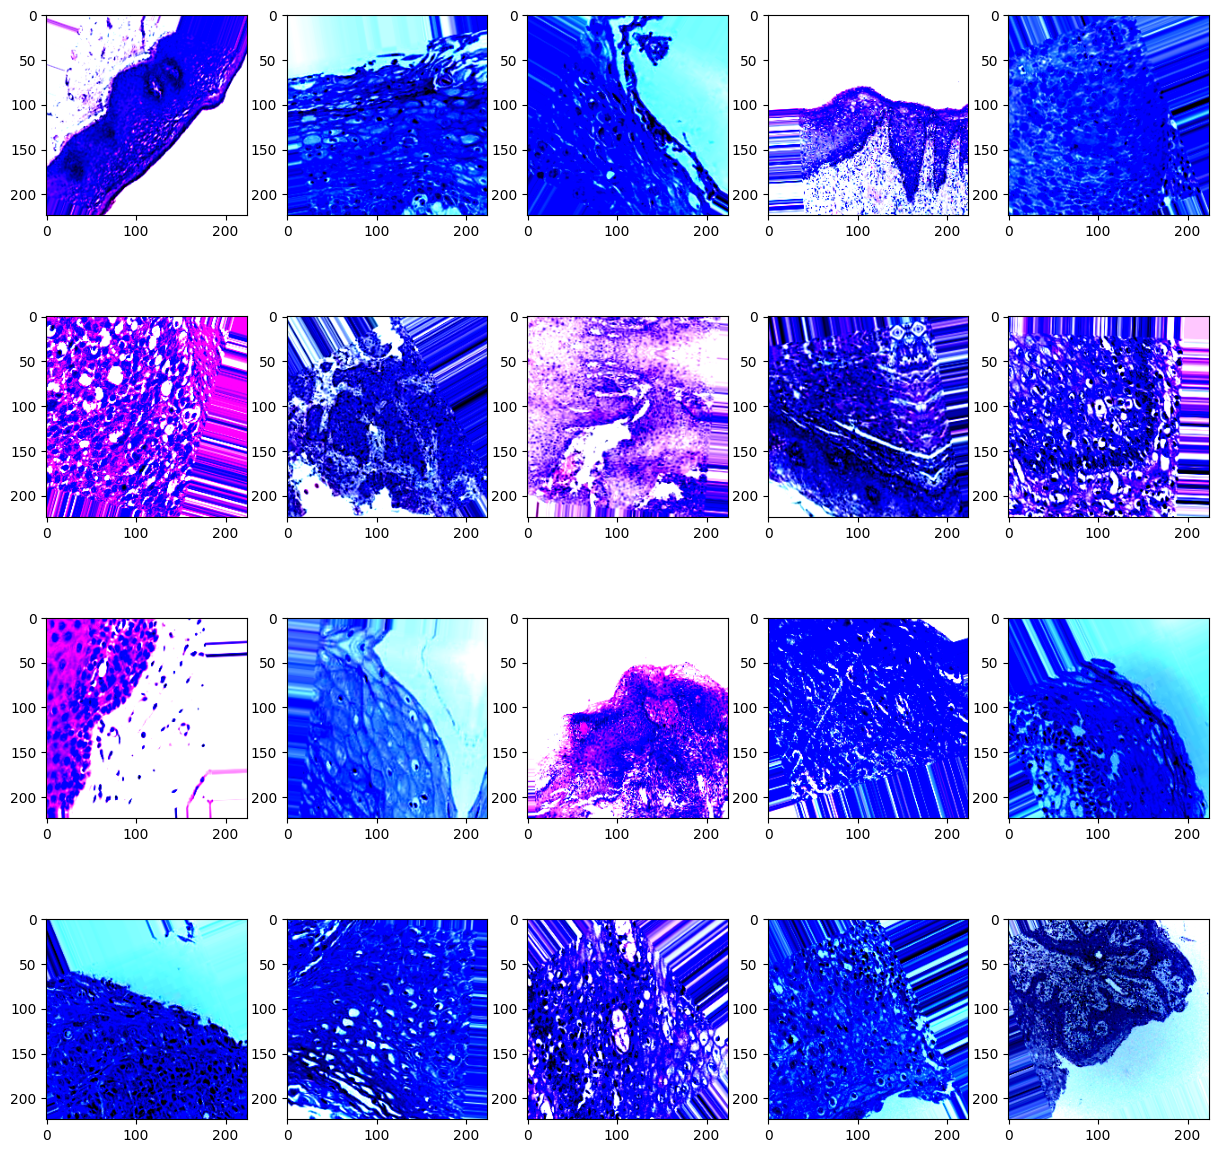

In [ ]:
plt.figure(figsize=(15,15))
for batch_x,batch_y in train_gen:
    for i in range(0,20):
        plt.subplot(4,5,i+1)
        plt.imshow(batch_x[i])
    plt.show()
    break

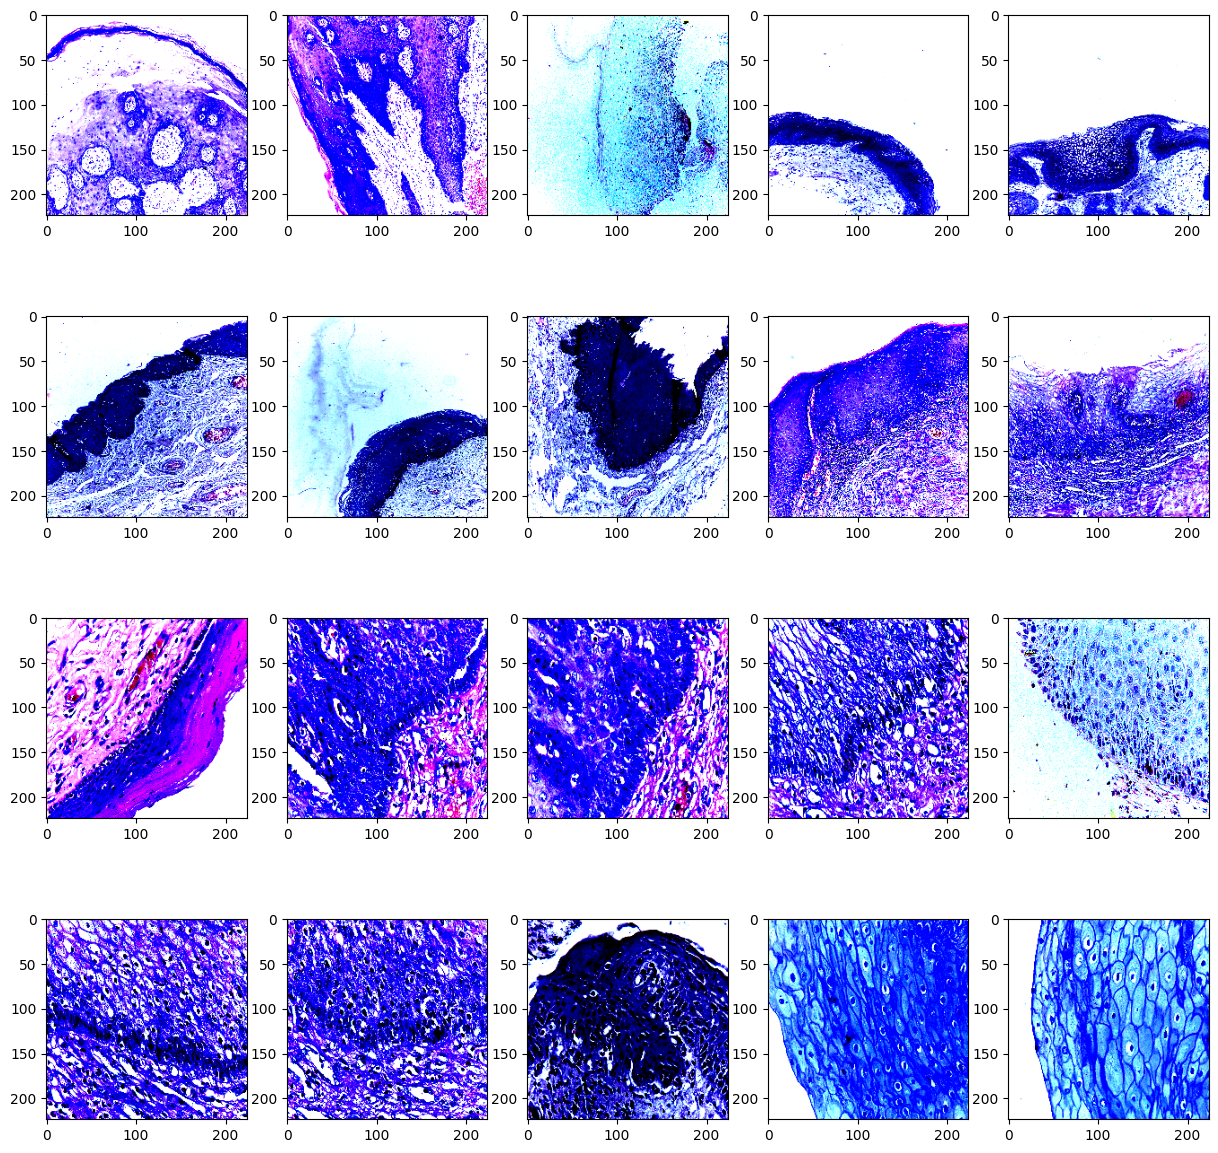

In [ ]:
plt.figure(figsize=(15,15))
for batch_x,batch_y in test_gen:
    for i in range(0,20):
        plt.subplot(4,5,i+1)
        plt.imshow(batch_x[i])
    plt.show()
    break

In [ ]:
model =tf.keras.applications.DenseNet201(
    include_top=False,
    input_shape=input_shape,
    weights='imagenet'
)
model.trainable = False

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
input_layer = tf.keras.layers.Input(shape=input_shape)
x = model(input_layer,training=False)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(2,activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer],outputs=[output])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet201 (Functional)             │ (None, 7, 7, 1920)          │      18,321,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 7, 1920)          │           7,680 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 94080)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      96,338,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           2,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,670,658 (437.43 MB)

 Trainable params: 96,344,834 (367.53 MB)

 Non-trainable params: 18,325,824 (69.91 MB)

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])

In [ ]:
# history = model.fit_generator(train_gen,validation_data=val_gen,epochs=10,
#                          callbacks=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True),verbose=True)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=True
)

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.8312 - loss: 1.4494 - val_accuracy: 0.8917 - val_loss: 1.0510
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.8442 - loss: 1.0064 - val_accuracy: 0.8417 - val_loss: 0.8965
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8506 - loss: 0.8808 - val_accuracy: 0.8250 - val_loss: 0.8995
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.8490 - loss: 0.8717 - val_accuracy: 0.8583 - val_loss: 0.8921
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.8542 - loss: 0.8162 - val_accuracy: 0.8583 - val_loss: 0.7897
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.8489 - loss: 0.7989 - val_accuracy: 0.8583 - val_loss: 0.7937
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.8429 - loss: 0.7775 - val_accuracy: 0.8500 - val_loss: 0.8374
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.8554 - loss: 0.7510 - val_accuracy: 0.8417 - v

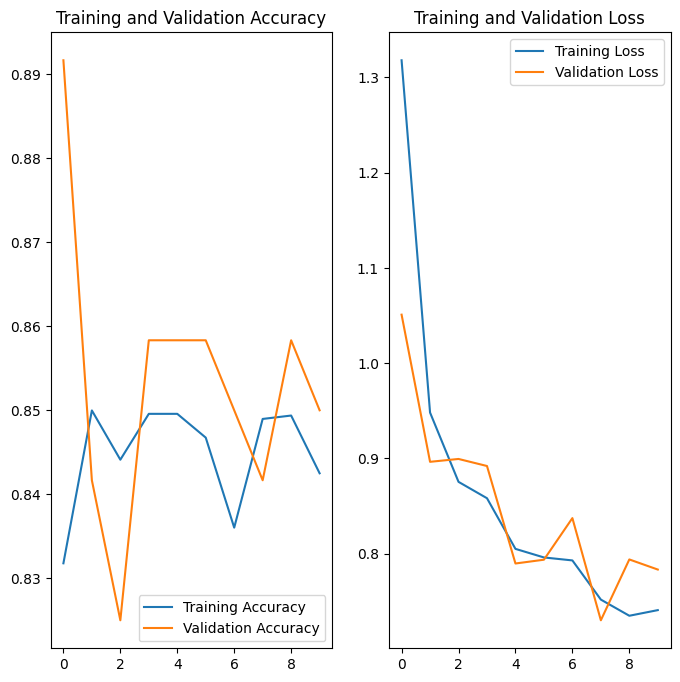

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(test_gen)

2/2 ━━━━━━━━━━━━━━━━━━━━ 35s 29s/step - accuracy: 0.8529 - loss: 0.7690


[0.7503311634063721, 0.8571428656578064]

In [ ]:
predictions =model.predict(test_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_707']
Received: inputs=Tensor(shape=(90, 224, 224, 3))
  warnings.warn(msg)


2/2 ━━━━━━━━━━━━━━━━━━━━ 75s 31s/step


In [ ]:
y_test = []
y_test_int = []
for i in tqdm(range(len(test_gen))):
    y_test += test_gen[i][1].tolist()
    y_test_int += test_gen[i][1].argmax(axis=1).tolist()
y_test = np.array(y_test)
y_test_int = np.array(y_test_int)

100%|██████████| 2/2 [00:17<00:00,  8.62s/it]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred_test = model.predict(test_gen, verbose=1)
y_pred_test_int = y_pred_test.argmax(axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


<Axes: >

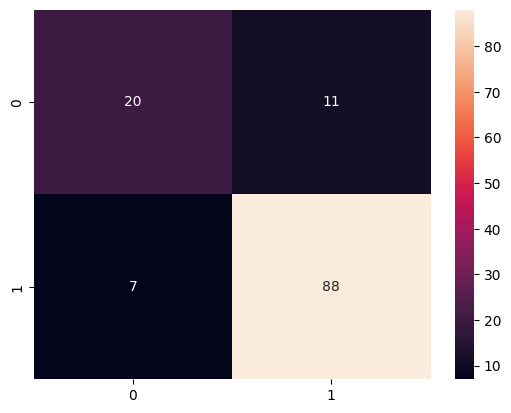

In [ ]:
import seaborn as sn
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test_int, y_pred_test_int)
sn.heatmap(cm,annot=True,fmt="d")

In [ ]:
target_names = ['NORMAL','OSCC']
print(classification_report(y_test_int, y_pred_test_int, target_names=target_names))

              precision    recall  f1-score   support

      NORMAL       0.74      0.65      0.69        31
        OSCC       0.89      0.93      0.91        95

    accuracy                           0.86       126
   macro avg       0.81      0.79      0.80       126
weighted avg       0.85      0.86      0.85       126

